# 1) Creating 3 txt files using Random and Names

Rather than creating our employees / hours / rates txt files manually, why don't we get Python to randomly generate everything for us?

In [1]:
# we need to install the Names library first
# !pip install names

# these are the libraries we will be working with
import names
import random
import string
import pandas as pd

# Txt file 1: employees.txt

Using the Random and Names library, we're going to create a dataframe that contains all the informations required for the employees.txt file, then remove its header and save the file locally.

In [2]:
# let's try and see how our names generator works
my_rand_name = names.get_full_name()

# according to the official documentation. Random can't generate letters. 
# But we need a letter for our PPS number! Let's be clever :)
my_alphabet = list(string.ascii_uppercase)

# we can now randomly pick any letter from the alphabet
my_rand_letter = random.choice(my_alphabet)

# now, onto our random employee IDs
my_rand_id = str(random.randint(1000,9999)) + random.choice(my_alphabet)

# for the hourly salary, any float between 12.0 and 20.0 will do
my_rand_salary = round(random.uniform(12, 20), 2)

# finally, let's print everything
print('Name:', names.get_full_name())
print('Staff ID:', str(random.randint(1000,9999)) + random.choice(my_alphabet))
print('PPS:', str(random.randint(1000000,9999999)) + random.choice(my_alphabet))
print('Hourly wage:', round(random.uniform(12, 20), 2))

Name: Lucien Aguilar
Staff ID: 4920Q
PPS: 9321740D
Hourly wage: 15.17


In [3]:
# we can now create a simple function that will generate lists, add dictionary keys to these lists, and pass
# the whole thing into a Pandas dataframe
def make_employeesdataframe(howmany):
    my_employees, my_id, my_hours, my_salary, my_pps = [],[],[],[],[]
    for r in range(howmany):
        my_employees.append( names.get_full_name() )
    for r in range(howmany):
        my_id.append( str(random.randint(1000,9999)) + random.choice(my_alphabet) )
    for r in range(howmany):
        my_hours.append( str(8) )
    for r in range(howmany):
        my_salary.append( round(random.uniform(12, 30), 2) )
    for r in range(howmany):
        my_pps.append( str(random.randint(1000000,9999999)) + random.choice(my_alphabet) )
    my_columns = {'name': my_employees, 'id': my_id, 'pps': my_pps, 'hours': my_hours, 'hourly_rate': my_salary}
    df = pd.DataFrame(my_columns)
    return df

In [61]:
# creating data for 50 employees
df = make_employeesdataframe(51)

# making sure it worked
df.head(5)

,name,id,pps,hours,hourly_rate
0,Alex Hersey,5822K,4047329T,8,24.93
1,James Manteca,4356K,3739507P,8,23.07
2,Levi Barrett,6027H,7902182X,8,14.00
3,Virginia Covarrubias,7069X,1087436W,8,18.53
4,Kimberly Lenz,2020J,4723359H,8,22.99


In [62]:
# before we save our dataframe into a txt file, we have to split our name serie into first name and last name
df['first_name'] = df['name'].apply(lambda x: x.split(' ')[0])

# same for our last name, this time in second position, so [1]
df['last_name'] = df['name'].apply(lambda x: x.split(' ')[1])

# we can now drop our old 'name' serie, using axis=1
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df = df.drop(['name'], axis=1)

# and now onto our overtime salary. Let's be generous: it's to be +30& of our base hourly income
df['overtime_rate'] = df['hourly_rate'].apply(lambda x: x * 1.3)
df['overtime_rate'] = df['overtime_rate'].apply(lambda x: round(x, 2))

# to be honest, I don't understand this tax credit / band stuff
# so I'll just base myself on the folling link, sorry if it makes zero sense
# https://www.irishjobs.ie/careeradvice/understanding-your-payslip/

# they say that the tax credit is a % of your income. I'll go for 10%
df['tax_credit'] = df['hourly_rate'].apply(lambda x: (x /100) * 10 )
# standard band is the tax bracket, right? Above this, employees are taxed more. We'll set it at 20/h
df['standard_band'] = 20

# last thing, Paul wants the txt file to be in a specific order
my_columns = ['first_name', 'last_name', 'id', 'pps', 'hours', 'hourly_rate', 'overtime_rate', 'tax_credit', 'standard_band']
df = df.reindex(columns=my_columns)

# showing our cleaned dataframe
df.sample(3)

,first_name,last_name,id,pps,hours,hourly_rate,overtime_rate,tax_credit,standard_band
48,Charlotte,Gehl,4403A,1694447E,8,15.50,20.15,1.550,20
7,Joshua,Pollard,6312J,8014357I,8,17.99,23.39,1.799,20
4,Kimberly,Lenz,2020J,4723359H,8,22.99,29.89,2.299,20


In [64]:
"""
And finally, saving the df as a txt file. I struggled a bit for this, but found help here:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html
# https://stackoverflow.com/questions/51829923/write-a-pandas-dataframe-to-a-txt-file

Something quite interesting: when using df.to_string I got some weird spacing issues, and my txt file
would end up completely messed up. It seems that the best solution is to stick to df.to_csv and most 
importantly to keep the index (which I had originally removed using index=False)
"""

df.to_csv('employees.txt', header=True, index=False, sep=' ')

# Text file 2: hours.txt

This is going to be much more straightforward. We're going to use Pandas' date_range() function, and then convert the datetime series to Y=M-D format, as date_range() by default adds hours (0), minutes (0), and seconds (0). The cool thing here is, we can generate a dataframe that is within any time range that we want to, as we can set up our starting and ending dates.

In [12]:
# defining a very simple function that creates a Pandas dataframe. Setting the default worked hours to 8
def make_hoursdataframe(my_start, my_end):
    my_dates = pd.date_range(start=my_start, end=my_end)
    my_dict = {'date': my_dates}
    df_hours = pd.DataFrame(my_dict)
    df_hours['hours'] = 8
    df_hours['date'] = df_hours.date.map(lambda x: x.strftime('%Y-%m-%d'))
    return df_hours

# creating our dataframe
df_hours = make_hoursdataframe('10/1/2020', '11/30/2020')

# making sure it all worked
df_hours.head(3)

,date,hours
0,2020-10-01,8
1,2020-10-02,8
2,2020-10-03,8


In [13]:
# same process as above, when we created our employees.txt file
df_hours.to_csv('hours.txt', header=True, index=False, sep=' ')

# Text file 2: taxrates.txt

Ok, I guess I'll have to be very honest here: I don't understand how this whole things work. I guess I should actually be a little bit more aware of how the whole tax system is structured, as I've been working here for over 10 years now.

Anyway, I'll use the official [citizen information website](https://www.citizensinformation.ie/en/money_and_tax/tax/income_tax_credits_and_reliefs/introduction_to_income_tax_credits_and_reliefs.html) as a source for this.

In [14]:
# third and last tine, let's create a dataframe building function!
def make_taxdataframe(working_hours):
    my_x, my_y = [20],[40]
    my_dict = {'standard_rate': my_x, 'higher_rate': my_y, 'hours': working_hours}
    df_tax = pd.DataFrame(my_dict)
    return df_tax

# creating this single row dataframe
df_tax = make_taxdataframe([8])
df_tax

,standard_rate,higher_rate,hours
0,20,40,8


In [15]:
# and that's our third and last txt file!
# same process as above, when we created our employees.txt file
df_tax.to_csv('taxrates.txt', header=True, index=False, sep=' ')

# 2) Getting our CA done
Loading our freshly created txt files, and creating our payslips!

In [1]:
# importing our main module, in case we're doing this second step independantly from the first one
import pandas as pd

In [2]:
# as weird as it seems, Pandas seems to read txt files through its read_csv function
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
df_employees = pd.read_csv('employees.txt', sep=' ')
# adding in a full name series, as several people might share the same first or last name, right?
df_employees['full_name'] = df_employees['first_name'] + ' ' + df_employees['last_name']

# next, let's load our hours.txt file. Same process, different dataframe name
df_hours = pd.read_csv('hours.txt', sep=' ')

# last but not least, here comes our taxrates.txt file
df_tax = pd.read_csv('taxrates.txt', sep=' ')

In [79]:
# getting a random employee mame, for our function below
df_employees.sample(1)

,first_name,last_name,id,pps,hours,hourly_rate,overtime_rate,tax_credit,standard_band,full_name
39,John,Carter,7122M,7856007B,8,18.8,24.44,1.88,20,John Carter


# Function description:

Something worth mentioning here: in Pandas, we don't need to specify the name of the columns that
we are doing our join on, unless they have different names.

Here, both our txt files have a column named 'hours' and contain the exact same value: 8

In [77]:
def make_payslip(employee_name, start_date, end_date):
    # pandas dataframe level
    df_refinedhours = df_hours.loc[ (df_hours['date'] > start_date) & (df_hours['date'] < end_date) ]
    df_temp = df_employees.loc[ df_employees['full_name'] == employee_name]
    df_temp = pd.merge(df_temp, df_refinedhours)
    df_temp = pd.merge(df_temp, df_tax)
    # pandas series level
    df_temp['overtime_worked'] = df_temp['hours'].apply(lambda x: x-8 if x > 8 else 0)
    df_temp['total_regular'] = df_temp['hours'] * df_temp['hourly_rate']
    df_temp['total_overtime'] = df_temp['overtime_worked'] * df_temp['overtime_rate']
    df_temp['date'] = pd.to_datetime(df_temp['date'])
    df_temp['day_name'] = df_temp['date'].dt.day_name()
    df_temp['month_name'] = df_temp['date'].dt.month_name()
    # pandas data wrangling
    my_groupby_regular = df_temp.groupby(['full_name','month_name','hourly_rate'], as_index=False).agg({'date': 'count', 'hours':'sum', 'total_regular':'sum'})
    my_groupby_overtime = df_temp.groupby(['full_name','month_name', 'overtime_rate'], as_index=False).agg({'overtime_worked':'sum', 'total_overtime':'sum'})
    my_grosspay = (df_temp.total_regular.sum() + df_temp.total_overtime.sum()).round(4)
    total_standardtaxes = (((sum(df_temp.hours) * df_temp.at[0, 'hourly_rate']) / 100) * df_temp.at[0, 'standard_rate']) if (df_temp.at[0, 'hourly_rate'] <= df_temp.at[0, 'standard_rate']) else 0
    total_highertaxes = (((sum(df_temp.hours) * df_temp.at[0, 'hourly_rate']) / 100) * df_temp.at[0, 'higher_rate']) if (df_temp.at[0, 'hourly_rate'] > df_temp.at[0, 'standard_rate']) else 0
    my_taxcredit = round(df_temp.tax_credit.sum())
    # printing everything together
    print('######################################################')
    print('Staff ID:', df_temp.at[0, 'id'] )
    print('Staff name:', df_temp.at[0, 'full_name'])
    print('PPS:', df_temp.at[0, 'pps'])
    print('Date range for this payslip:', 'from', df_temp.date.dt.date.min(), 'to', df_temp.date.dt.date.max())
    print('######################################################')
    print('Regular')
    print(my_groupby_regular)
    print('Overtime (if applies)')
    print(my_groupby_overtime)
    print('######################################################')
    print('Gross pay:', my_grosspay)
    print('######################################################')
    print('Standard band (if applies):', total_standardtaxes)
    print('Higher rate (if applies):', total_highertaxes)
    print('Total deductions:', total_standardtaxes + total_highertaxes)
    print('Tax credit:', my_taxcredit)
    print('Net deductions:', (total_standardtaxes + total_highertaxes) - my_taxcredit)
    print('######################################################')
    print('Net pay:', my_grosspay - ((total_standardtaxes + total_highertaxes) - my_taxcredit) )
    print('######################################################')

In [81]:
make_payslip('John Carter', '2020-10-01', '2020-11-02')

######################################################
Staff ID: 7122M
Staff name: John Carter
PPS: 7856007B
Date range for this payslip: from 2020-10-02 to 2020-11-01
######################################################
Regular
     full_name month_name  hourly_rate  date  hours  total_regular
0  John Carter   November         18.8     1      8          150.4
1  John Carter    October         18.8    30    240         4512.0
Overtime (if applies)
     full_name month_name  overtime_rate  overtime_worked  total_overtime
0  John Carter   November          24.44                0             0.0
1  John Carter    October          24.44                0             0.0
######################################################
Gross pay: 4662.4
######################################################
Standard band (if applies): 932.48
Higher rate (if applies): 0
Total deductions: 932.48
Tax credit: 58.0
Net deductions: 874.48
######################################################
Net pay: 3787

# 3) Extra 1: Having some fun with our dataframe

What if we added some more series, like email addresses, age, role, etc..?

To do so, we're going to create a fictional company named "MScBizAnalyticsDBS". What do we do? We sell paper, [of course](https://media4.giphy.com/media/5wWf7GR2nhgamhRnEuA/giphy.gif?cid=ecf05e47m5len2ftyls2jzt0l43y5msp07fskijbp23eftof&rid=giphy.gif).

In [28]:
# we'll be needing some additional libraries for this
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
# first, let's create a randomized age column, based on:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html
df['age'] = np.random.randint(18, 61, df.shape[0])

In [30]:
# next, let's assign an email address to each employee
df['email'] = df['first_name'] + '.' + df['last_name'] +'@MScBizAnalyticsDBS.com'
df['email'] = df['email'].apply(lambda x: x.lower())

In [32]:
# and finally, let's try and see who's doing what, based on the salary column

# let's define an upper tier salary base, combining the salary mean and standard deviation
my_upper_tier = df.salary.mean() + df.salary.std()
print('Managers in this company make more than:', round(df.salary.mean() + df.salary.std(), 2), 'EUR per hour' )

# we can now create a categorical serie, based on the simple calculation we just established
def make_company_role(salary):
    if salary >= my_upper_tier:
        return 'manager'
    else:
        return 'employee'

# applying this function to a new serie
df['role'] = df['salary'].apply(make_company_role)

Managers in this company make more than: 25.63 EUR per hour


In [33]:
# we can now get a grouped by overview of our company
df.groupby('role', as_index=False).agg( {'salary': 'mean', 'age': 'mean'} )

,role,salary,age
0,employee,18.733000,41.475000
1,manager,27.714545,37.909091


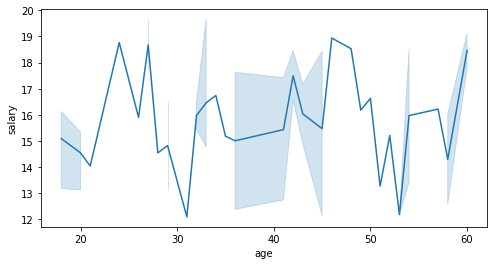

In [99]:
# plotting
plt.figure(figsize=(8,4))
sns.lineplot(df.age, df.salary)
plt.show()

# 4) Extra 2: Automating payslip emails